[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  4 of 4 completed
Nani?! in data
[[0.14726591 0.00740369 0.28348061 0.90560406]
 [0.16287018 0.00718103 0.23738952 0.93958657]
 [0.15941873 0.00679135 0.2424201  0.91673288]
 ...
 [0.75404546 0.86439547 0.17675049 0.75198726]
 [0.77007934 0.87085282 0.16723317 0.74721776]
 [0.76770556 0.87096412 0.17036029 0.75616054]]


array([[0.11210598],
       [0.11399429],
       [0.10947491],
       ...,
       [0.76521772],
       [0.75404546],
       [0.77007934]])

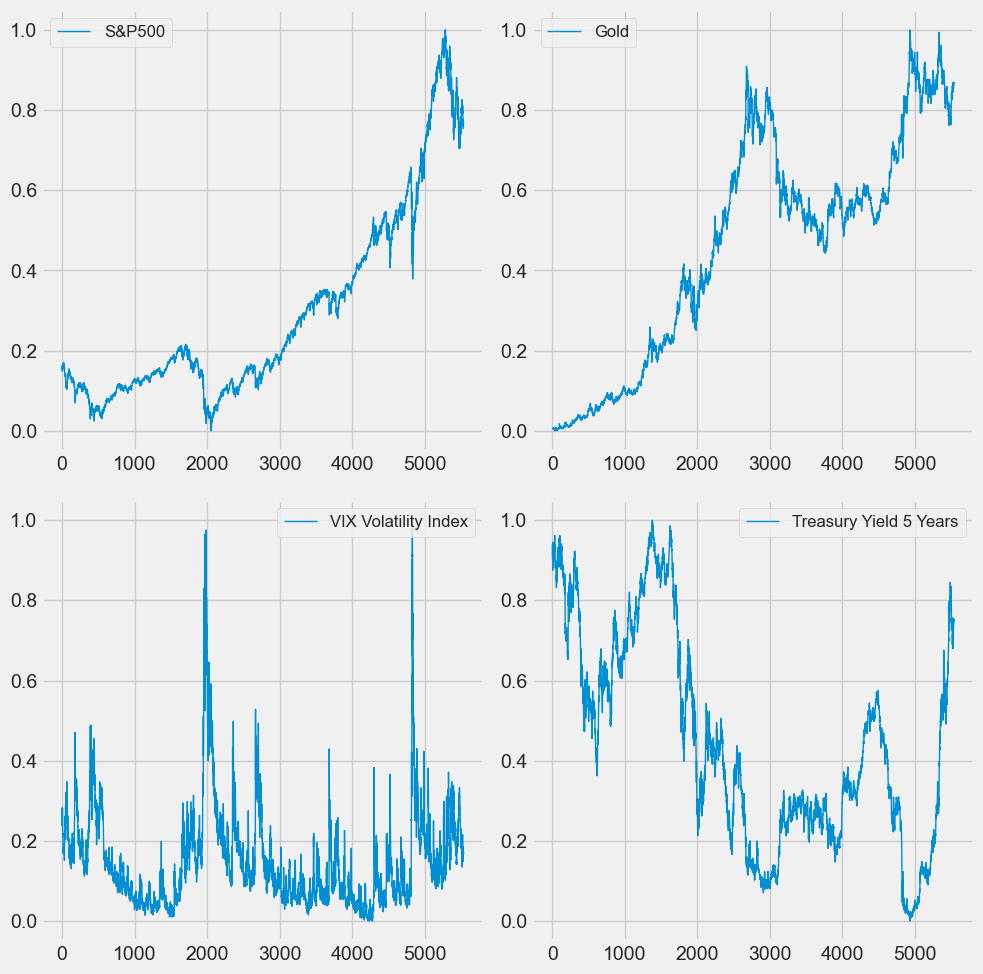

In [1]:
import sys
sys.path.insert(1, r"C:/Users/mihao/OneDrive - Univerza v Ljubljani/Doktorski_studij/Delo/Evolving transformer")
sys.path.insert(1, r"C:\Users\Miha\OneDrive - Univerza v Ljubljani\Doktorski_studij\Delo\Evolving transformer")
from importlib import reload 
import data.dataclass as dataclass
reload(dataclass)

input_length = 256
output_length = 1
database = dataclass.StockData(input_length,output_length)
database.display_data_norm()

#print(database.data_dropped)
print(database.data_norm)

#print(database.datasnp_dropped)
scalar = database.scalar

database.dataset_input
database.dataset_output


In [2]:

import pandas as pd
import numpy as np
import torch
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

print(torch.cuda.is_available())

class Stockdataset(Dataset):
    def __init__(self, data, input_length = 128, output_length = 1):
        self.data = data
        self.data = torch.from_numpy(data).float()#.view(-1)
        self.seq_len = input_length
        self.out_len = output_length

    def __len__(self):
        return len(self.data)-self.seq_len-1

    def __getitem__(self, index):
        return self.data[index : index+self.seq_len], self.data[index+self.seq_len+1: index+self.seq_len+self.out_len+1,0]
        
size_training = int(len(database.data_norm)*0.8)
size_test = len(database.data_norm) - size_training
data_train, data_test = database.data_norm[0:size_training,:], database.data_norm[size_training:len(database.data_norm),:]

print(data_train.shape)
print(data_test.shape)

train_dataset = Stockdataset(data_train, input_length, output_length)
test_dataset = Stockdataset(data_test, input_length, output_length)
whole_dataset = Stockdataset(database.data_norm, input_length, output_length)

print(test_dataset.__getitem__(1)[0].shape)
print(train_dataset.__getitem__(1)[1].shape)
print(whole_dataset.__getitem__(0)[0].shape)

'''
class Stockdataset(Dataset):
    def __init__(self, dataset_input, dataset_output):
        self.dataset_input = torch.from_numpy(dataset_input).float()#.view(-1)
        self.dataset_output = torch.from_numpy(dataset_output).float()#.view(-1)
        
    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, index):
        return self.dataset_input[index], self.dataset_output[index]


size_training = int(len(database.data_norm)*0.8)
size_test = len(database.data_norm) - size_training
data_train, data_test = database.data_norm[0:size_training,:], database.data_norm[size_training:len(database.data_norm),:]

train_dataset = Stockdataset(database.train_dataset_input, database.train_dataset_output)
test_dataset = Stockdataset(database.test_dataset_input, database.test_dataset_output)
validation_dataset = Stockdataset(database.validation_dataset_input, database.validation_dataset_output)
whole_dataset = Stockdataset(database.dataset_input, database.dataset_output)

print(test_dataset.__getitem__(1)[0].shape)
print(train_dataset.__getitem__(1)[1].shape)
print(whole_dataset.__getitem__(0)[0].shape)
'''

True
(4431, 4)
(1108, 4)
torch.Size([256, 4])
torch.Size([1])
torch.Size([256, 4])


'\nclass Stockdataset(Dataset):\n    def __init__(self, dataset_input, dataset_output):\n        self.dataset_input = torch.from_numpy(dataset_input).float()#.view(-1)\n        self.dataset_output = torch.from_numpy(dataset_output).float()#.view(-1)\n        \n    def __len__(self):\n        return len(self.dataset)\n\n    def __getitem__(self, index):\n        return self.dataset_input[index], self.dataset_output[index]\n\n\nsize_training = int(len(database.data_norm)*0.8)\nsize_test = len(database.data_norm) - size_training\ndata_train, data_test = database.data_norm[0:size_training,:], database.data_norm[size_training:len(database.data_norm),:]\n\ntrain_dataset = Stockdataset(database.train_dataset_input, database.train_dataset_output)\ntest_dataset = Stockdataset(database.test_dataset_input, database.test_dataset_output)\nvalidation_dataset = Stockdataset(database.validation_dataset_input, database.validation_dataset_output)\nwhole_dataset = Stockdataset(database.dataset_input, dat

In [ ]:
batch_size = 128
train_dataloader = DataLoader(train_dataset, batch_size, drop_last = True) #drop_last = True ignores last batch is data is not divisable by batch_size
test_dataloader = DataLoader(test_dataset, batch_size, drop_last = True)
whole_dataloader = DataLoader(whole_dataset, 1, drop_last = False)

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [4]:
class Lstm_model(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_size, num_layers):
        super(Lstm_model, self).__init__()
        self.num_layers = num_layers
        self.input_size = input_dim
        self.output_size = output_dim
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size=input_dim, hidden_size=hidden_size, num_layers=num_layers)
        self.fc = nn.Linear(hidden_size, output_dim)

    def forward(self, x, hn, cn):
        out, (hn, cn) = self.lstm(x, (hn,cn))
        final_out = self.fc(out) #-1 returns last element
        #final_out = self.fc(out)
        return final_out[-1], hn, cn

    def predict(self, x):
        hn, cn = self.init()
        final_out = self.fc(out)
        #final_out = self.fc(out)
        return final_out[-1]

    def init(self):
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(device) #zakaj je batch_size tako?
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(device)
        return h0,c0


input_dim = 4
output_dim = 1
hidden_size = input_length//16
num_layers = 3
model = Lstm_model(input_dim, output_dim, hidden_size, num_layers).to(device)



In [5]:
loss_fun = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)

In [6]:
def train(dataloader):
    hn, cn = model.init()
    model.train()
    loss_sum = 0
    for batch, item in enumerate(dataloader):
        x, y = item
        x = x.to(device)
        y = y.to(device)
        out, hn, cn = model(x.reshape(input_length, batch_size, input_dim), hn, cn)
        #out, hn, cn = model(x, hn, cn)
        loss = loss_fun(out.reshape(output_dim, batch_size), y.reshape(output_dim, batch_size))
        loss_sum = loss_sum + loss.item()
        hn = hn.detach() #detach hn is not a parameters and does not need to be updated!!!
        cn = cn.detach()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch == len(dataloader) -1:
            #loss = loss.item()
            print(f"Train loss: {loss_sum:>7f}")

In [7]:
def test(dataloader):
    hn, cn = model.init()
    loss_sum = 0
    for batch, item in enumerate(dataloader):
        x, y = item
        x = x.to(device)
        y = y.to(device)
        out, hn, cn = model(x.reshape(input_length, batch_size, input_dim), hn, cn)
        loss = loss_fun(out.reshape(output_length, batch_size), y.reshape(output_length, batch_size))
        loss_sum = loss_sum + loss.item()
        if batch == len(dataloader) -1:
            #loss = loss.item()
            print(f"Test loss: {loss_sum:>7f}")   
    return loss_sum
            

In [8]:
epochs = 200
best_model = 1
for epoch in range(epochs):
    print(f"Epoch {epoch}")
    train(train_dataloader)
    loss_test = test(test_dataloader)
    if (best_model > loss_test):
        best_model = loss_test
        #state = {
        #'epoch': epoch,
        #'state_dict': model.state_dict(),
        #'optimizer': optimizer.state_dict()}
        torch.save(model.state_dict(), "model_multivariate.pt")
        
best_model

Epoch 0
Train loss: 0.302588
Test loss: 1.368924
Epoch 1
Train loss: 0.860458
Test loss: 2.087908
Epoch 2
Train loss: 0.441224
Test loss: 1.840993
Epoch 3
Train loss: 0.492015
Test loss: 1.802902
Epoch 4
Train loss: 0.433281
Test loss: 1.590056
Epoch 5
Train loss: 0.420909
Test loss: 1.434343
Epoch 6
Train loss: 0.326816
Test loss: 1.410975
Epoch 7
Train loss: 0.255662
Test loss: 1.266214
Epoch 8
Train loss: 0.246535
Test loss: 1.181557
Epoch 9
Train loss: 0.224315
Test loss: 1.136457
Epoch 10
Train loss: 0.180075
Test loss: 1.052301
Epoch 11
Train loss: 0.181717
Test loss: 1.064916
Epoch 12
Train loss: 0.113545
Test loss: 0.972051
Epoch 13
Train loss: 0.108086
Test loss: 0.896871
Epoch 14
Train loss: 0.106835
Test loss: 0.882746
Epoch 15
Train loss: 0.072850
Test loss: 0.730793
Epoch 16
Train loss: 0.083190
Test loss: 0.644523
Epoch 17
Train loss: 0.044513
Test loss: 0.548625
Epoch 18
Train loss: 0.029718
Test loss: 0.468159
Epoch 19
Train loss: 0.039173
Test loss: 0.458419
Epoch 20
T

KeyboardInterrupt: 

In [ ]:
import math
from sklearn.metrics import mean_squared_error
import numpy as np
def calculate_metrics(dataloader):
    pred_arr = []
    y_arr = []
    with torch.no_grad():
        hn, cn = model.init()
        for batch, item in enumerate(dataloader):
            x, y = item
            x, y = x.to(device), y.to(device)
            x = x.view(input_length, batch_size, input_dim)
            pred = model(x, hn, cn)[0]
            pred = pred.view(batch_size, output_length)
            pred = np.repeat(pred.detach().cpu().numpy(),input_dim,axis=1)
            pred = scalar.inverse_transform(pred)[:,0].reshape(-1)
            y = np.repeat(y.detach().cpu().numpy().reshape(-1,1),input_dim,axis=1)
            y = scalar.inverse_transform(y)[:,0].reshape(-1)
            pred_arr = pred_arr + list(pred)
            y_arr = y_arr + list(y)
        return math.sqrt(mean_squared_error(y_arr,pred_arr))



In [ ]:

#model.load_state_dict(torch.load("model_multivariate"))
#model.eval()


In [ ]:

print(f"Train MSE loss {calculate_metrics(train_dataloader)}")
print(f"Test MSE loss {calculate_metrics(test_dataloader)}")

Train MSE loss 123.57058490241519
Test MSE loss 785.2003327177084


In [ ]:
def simulate(dataloader):
    pred_arr = []
    y_arr = []
    with torch.no_grad():
        hn, cn = model.init()
        for batch, item in enumerate(dataloader):
            x, y = item
            x, y = x.to(device), y.to(device)
            x = x.view(input_length, 1, input_dim)
            pred = model(x, hn, cn)[0]
            pred = pred.view(1, output_length)
            pred = np.repeat(pred.detach().cpu().numpy(),input_dim,axis=1)
            pred = scalar.inverse_transform(pred)[:,0].reshape(-1)
            y = np.repeat(y.detach().cpu().numpy().reshape(-1,1),input_dim,axis=1)
            y = scalar.inverse_transform(y)[:,0].reshape(-1)
            pred_arr = pred_arr + list(pred)
            y_arr = y_arr + list(y)
        return pred_arr, y_arr


In [ ]:
batch_size = 1
whole_pred_arr, whole_y_arr = simulate(whole_dataloader)

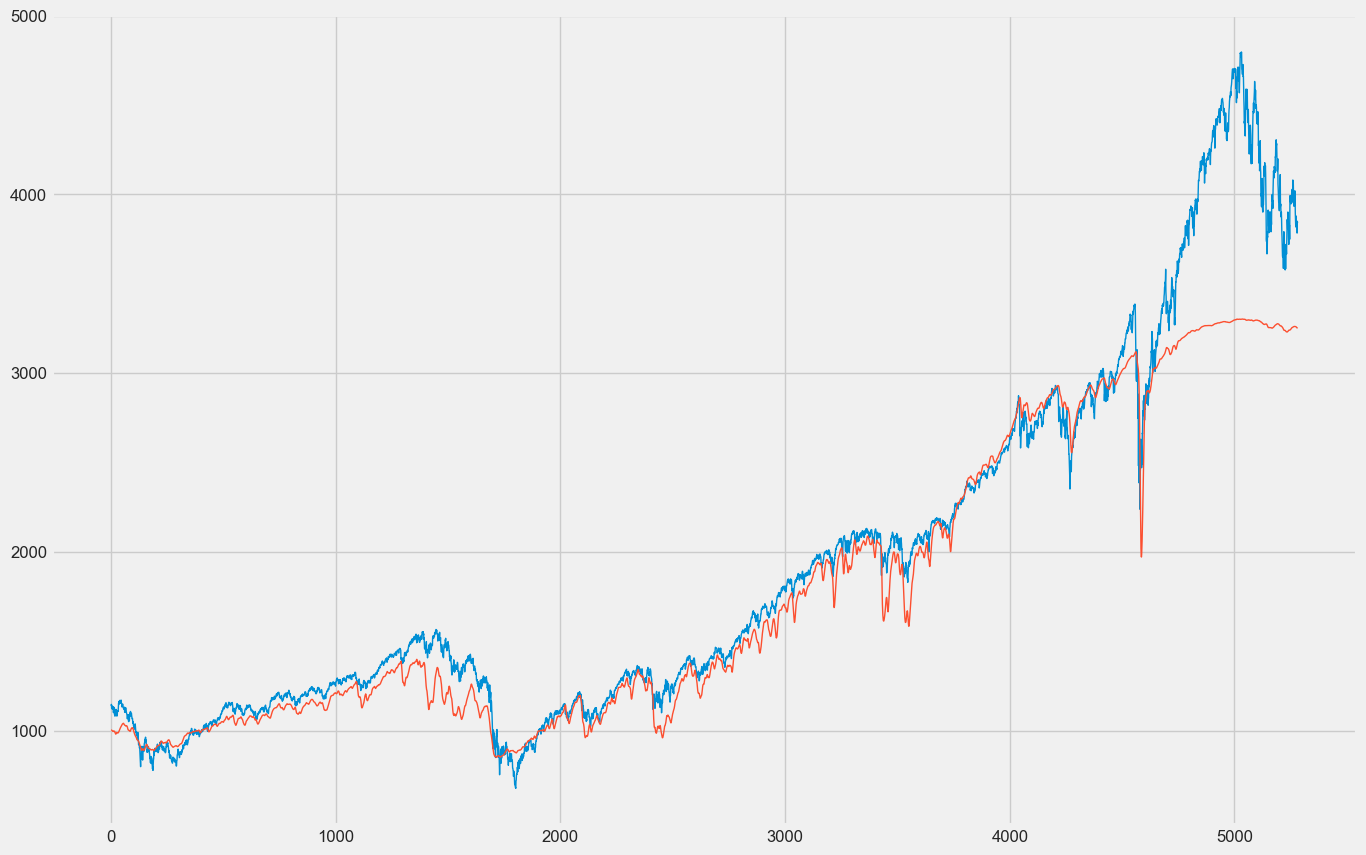

In [ ]:
import matplotlib.pyplot as plt
fig1, axes1 = plt.subplots(figsize = (15, 10))
axes1.plot(whole_y_arr, linewidth=1)
axes1.plot(whole_pred_arr, linewidth=1)
fig1.savefig("whole_miltivariate.pdf")